### Import libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from keras.layers import Activation, Conv2D, BatchNormalization, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix

### Import data

In [2]:
data = np.load('/content/drive/My Drive/Data Science/DataSet/NPZ/masks_data.npz')
x_train, x_test, y_train, y_test = data['x_train'], data['x_test'], data['y_train'], data['y_test']

In [3]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (3257, 64, 64, 3)
x_test shape: (815, 64, 64, 3)
y_train shape: (3257, 3)
y_test shape: (815, 3)


### Build our model

In [4]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D((2,2), strides=(1,1), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D((2,2), strides=(1,1), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D((2,2), strides=(1,1), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 128)       7

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
CALLBACKS = EarlyStopping(monitor='val_accuracy', patience=10)

In [7]:
EPOCHS = 100

In [8]:
history = model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[CALLBACKS]
)

Epoch 1/100
102/102 [==============================] - 234s 2s/step - loss: 0.5293 - accuracy: 0.8723 - val_loss: 0.2404 - val_accuracy: 0.9399
Epoch 2/100
102/102 [==============================] - 235s 2s/step - loss: 0.2309 - accuracy: 0.9334 - val_loss: 0.1622 - val_accuracy: 0.9485
Epoch 3/100
102/102 [==============================] - 238s 2s/step - loss: 0.2244 - accuracy: 0.9340 - val_loss: 0.1661 - val_accuracy: 0.9485
Epoch 4/100
102/102 [==============================] - 235s 2s/step - loss: 0.1910 - accuracy: 0.9374 - val_loss: 0.1727 - val_accuracy: 0.9460
Epoch 5/100
102/102 [==============================] - 234s 2s/step - loss: 0.2018 - accuracy: 0.9383 - val_loss: 0.1664 - val_accuracy: 0.9534
Epoch 6/100
102/102 [==============================] - 237s 2s/step - loss: 0.1826 - accuracy: 0.9395 - val_loss: 0.1501 - val_accuracy: 0.9521
Epoch 7/100
102/102 [==============================] - 235s 2s/step - loss: 0.1771 - accuracy: 0.9447 - val_loss: 0.1993 - val_accuracy:

### Test the model

In [21]:
model.evaluate(x_test, y_test)

26/26 [==============================] - 11s 408ms/step - loss: 0.2301 - accuracy: 0.9509


[0.2301301509141922, 0.9509202241897583]

### Plot the predicted data 

In [22]:
yhat = np.argmax(model.predict(x_test), axis=1)
y = np.argmax(y_test, axis=1)

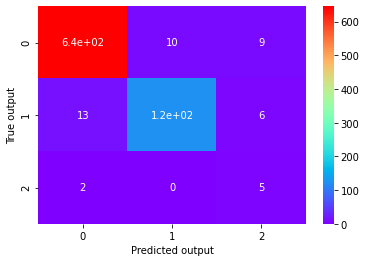

In [32]:
sns.heatmap(confusion_matrix(yhat, y), annot=True, cmap='rainbow')
plt.xlabel('Predicted output')
plt.ylabel('True output')
plt.show()

### Plot the loss and accurcy of model

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
l = history.history['loss']
val_l = history.history['val_loss']
epoch_len = range(1,len(l)+1)

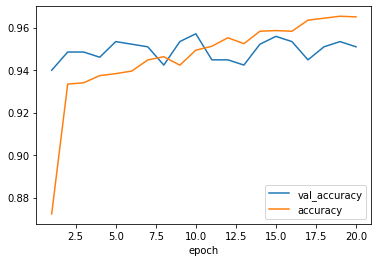

In [20]:
plt.plot(epoch_len, val_acc, label='val_accuracy')
plt.plot(epoch_len, acc, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('')
plt.legend()
plt.show()

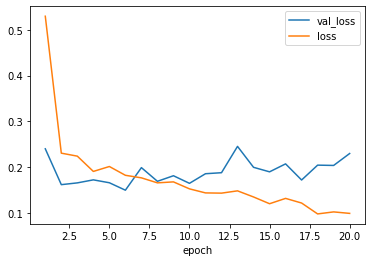

In [19]:
plt.plot(epoch_len, val_l, label='val_loss')
plt.plot(epoch_len, l, label='loss')
plt.xlabel('epoch')
plt.ylabel('')
plt.legend()
plt.show()

In [13]:
model.save('mask_detector_AI.h5')